Date and time  2022-01-23 20:58:50.724399
 
fileList is:  ../CometImages/CA210609/Collated/4GyA/bmp/4GyA0027.bmp
fileNames is:  4GyA0027.bmp
ImgRaw shape (2048, 2048)
Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 2048 of columns 2048 of pixels 4194304 and depth 1
Maximum pixel value  255
Minimum pixel value  2
max and min pixel values for  4GyA0027.bmp  is:  255 2


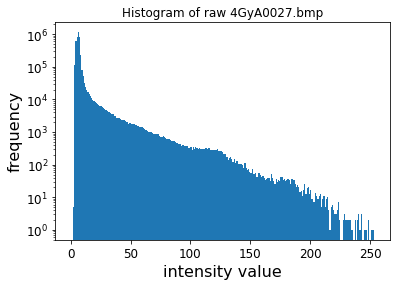

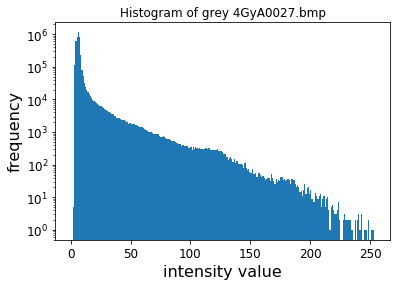

thresh is:  [ 5.1 10.2 15.3 20.4 25.5]
Image dimension in x 2048 pixels, in y 2048 pixels
Clusters analysed if centre in x range 32 to 2016 and y range 16 to 2032


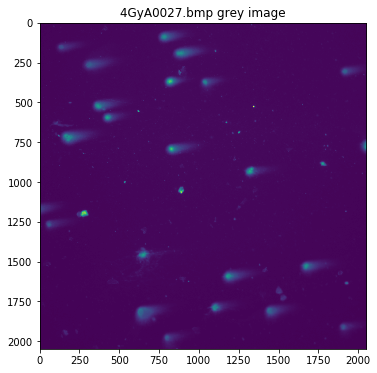

thisThresh is:  10


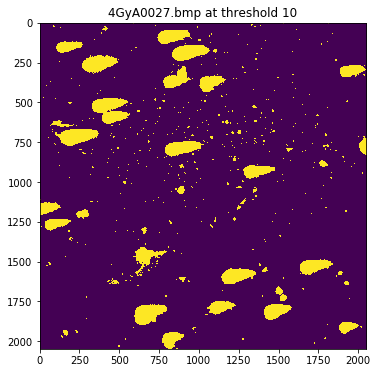

 
Run DBSCAN, threshold number  1  value  10
xIrrad shape:  (328192,)
yIrrad shape:  (328192,)
iThr shape:  (328192,)
imgGrey shape:  (2048, 2048)


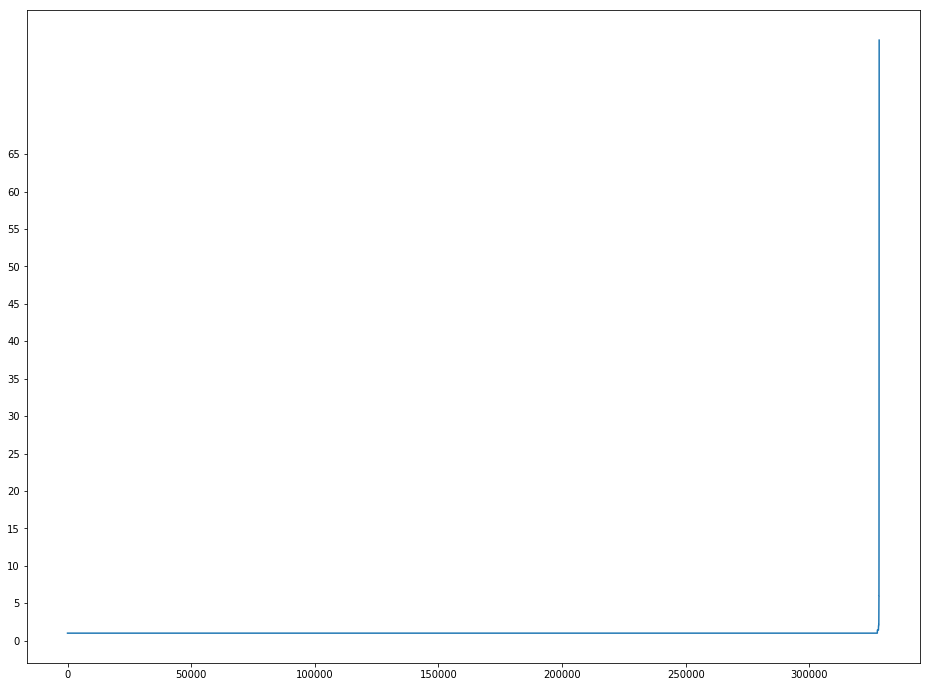

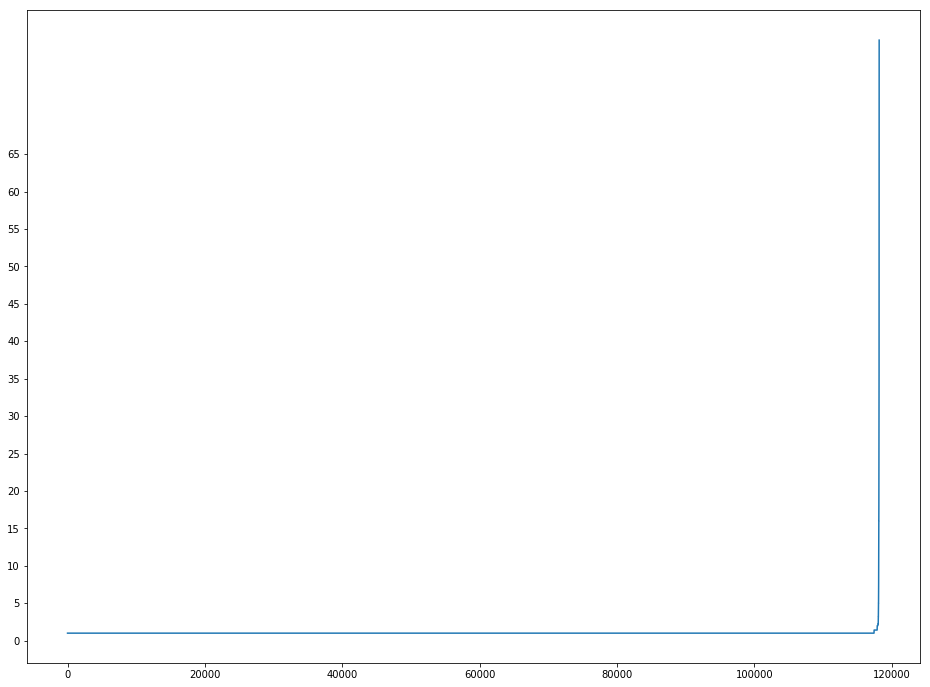

Number of clusters 739
Average number of pixels per cluster 443.52909336941815
Average xWid 12.31529093369418 standard deviation 33.592751997353275
Average yWid 9.428958051420839 standard deviation 19.144808907794484
Number of clusters in fiducial area 719
Average number of pixels per cluster in fiducial area 449.3045897079277
Average xWidFid 3.1657009789978603 standard deviation 8.03564502923779
Average yWidFid 2.425585370387637 standard deviation 4.371454479264893


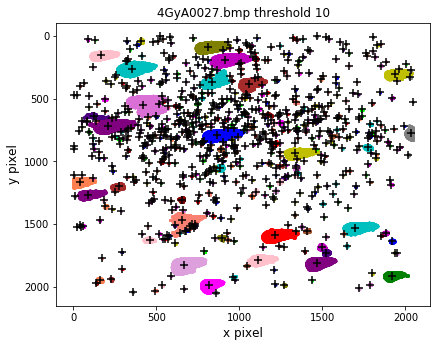

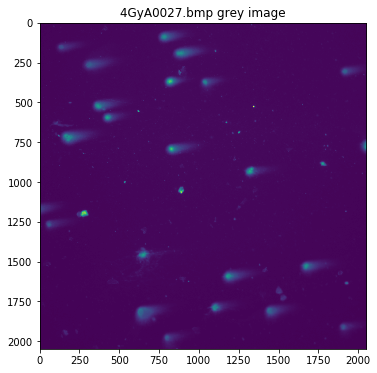

thisThresh is:  15


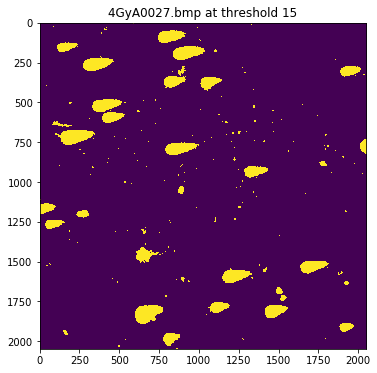

 
Run DBSCAN, threshold number  2  value  15
xIrrad shape:  (220011,)
yIrrad shape:  (220011,)
iThr shape:  (220011,)
imgGrey shape:  (2048, 2048)


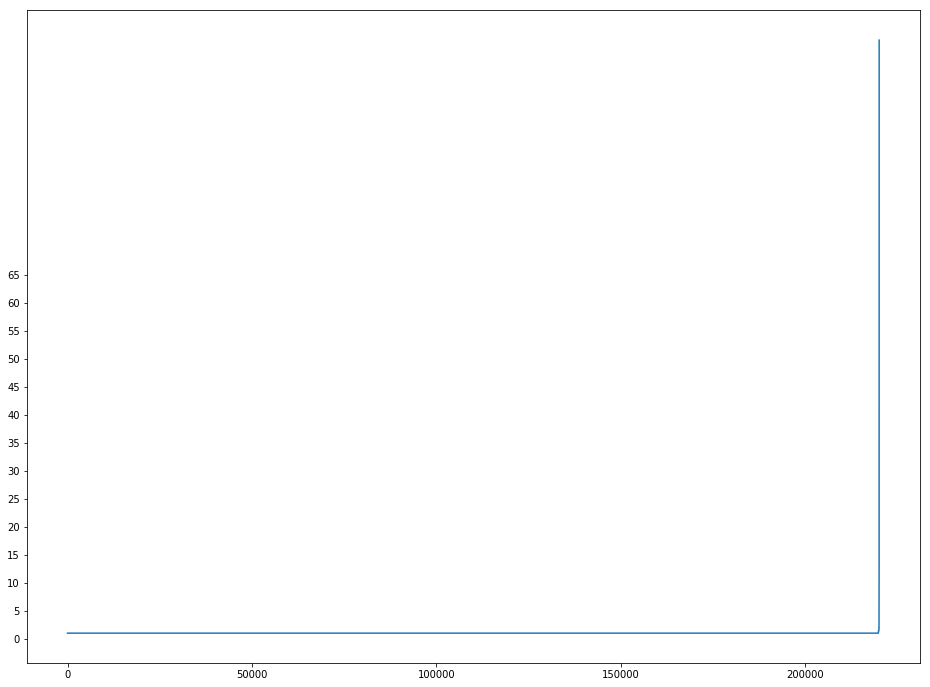

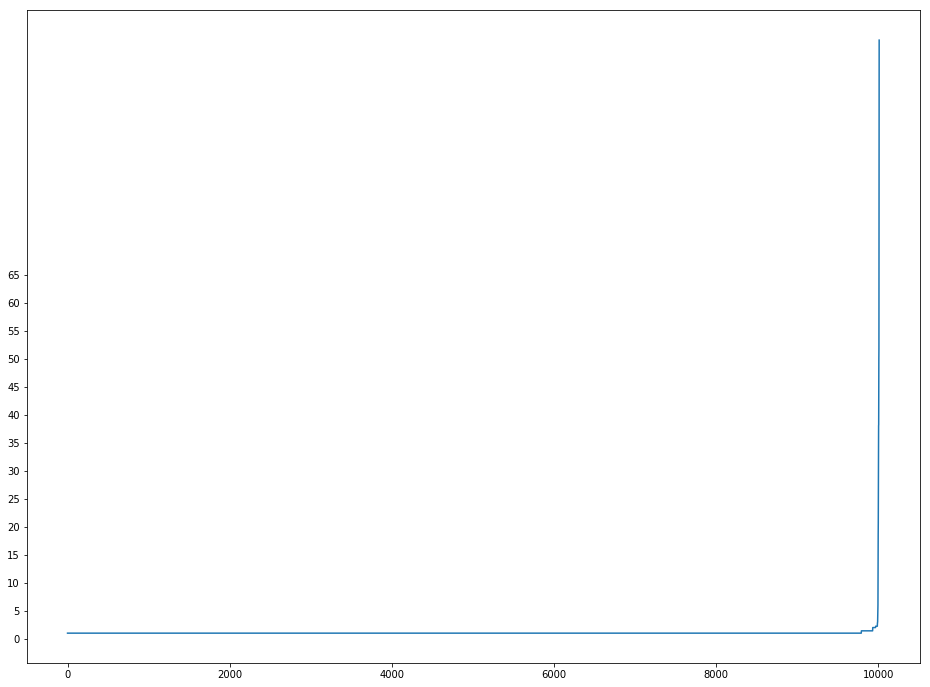

Number of clusters 255
Average number of pixels per cluster 862.435294117647
Average xWid 21.49019607843137 standard deviation 45.471116688539
Average yWid 14.541176470588235 standard deviation 23.360878781403887
Number of clusters in fiducial area 248
Average number of pixels per cluster in fiducial area 872.8185483870968
Average xWidFid 5.348445760601473 standard deviation 10.84121754615277
Average yWidFid 3.610094014552573 standard deviation 5.404915980208126


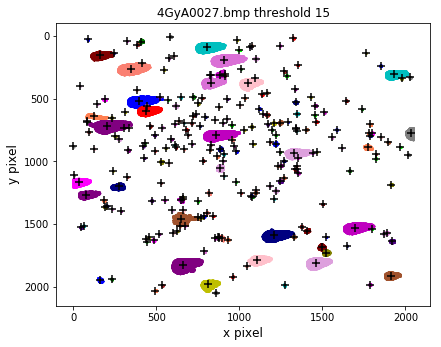

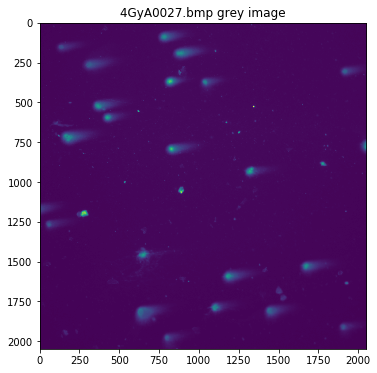

thisThresh is:  20


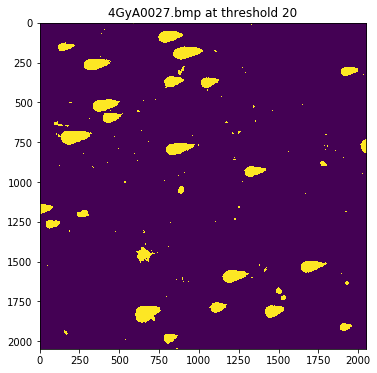

 
Run DBSCAN, threshold number  3  value  20
xIrrad shape:  (169454,)
yIrrad shape:  (169454,)
iThr shape:  (169454,)
imgGrey shape:  (2048, 2048)


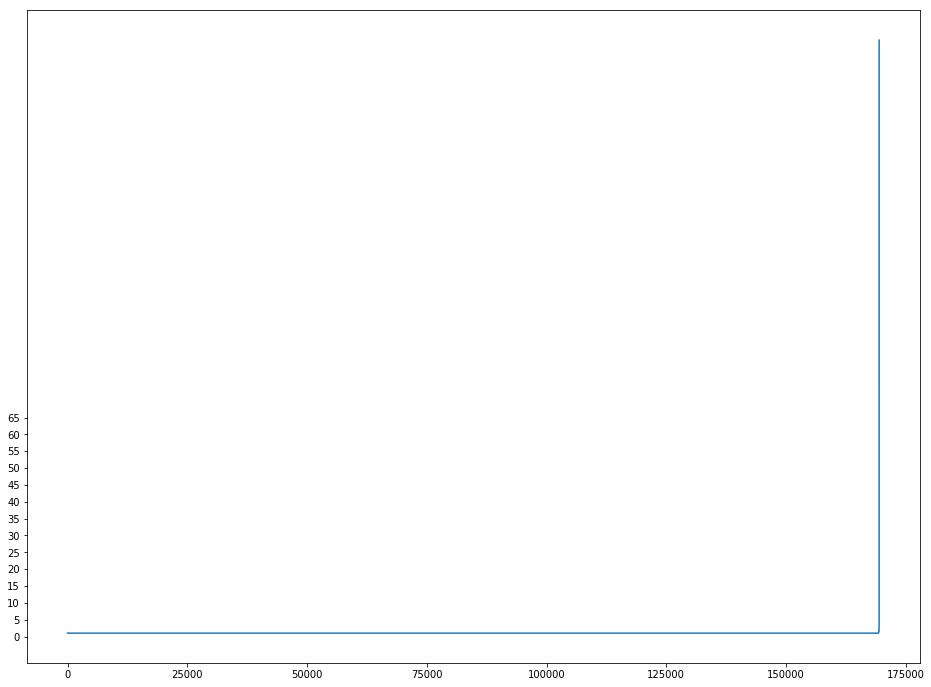

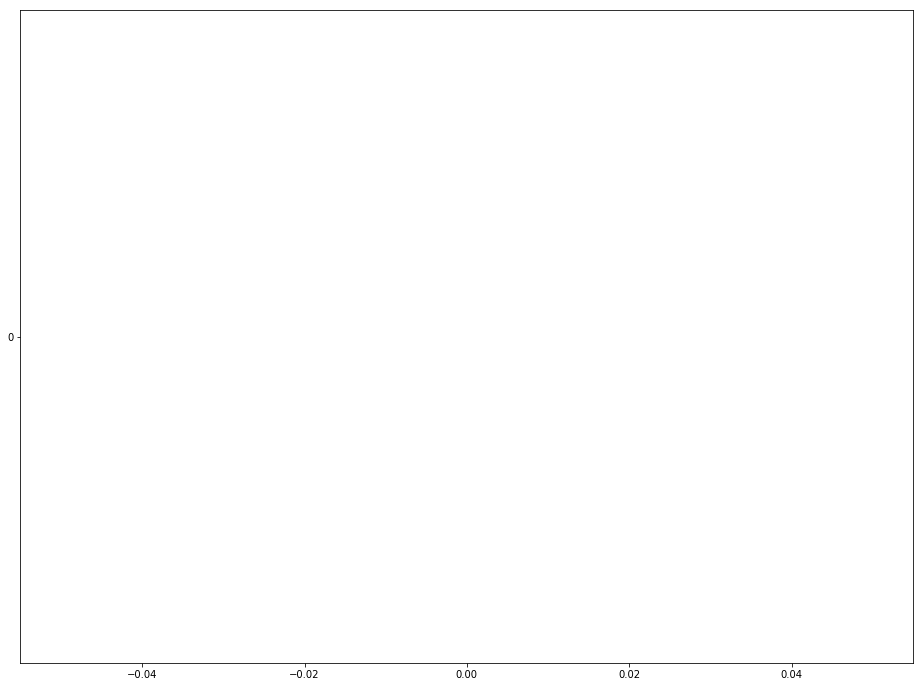

Number of clusters 157
Average number of pixels per cluster 1079.0
Average xWid 26.97452229299363 standard deviation 47.44355668193173
Average yWid 17.85987261146497 standard deviation 25.086718032453412
Number of clusters in fiducial area 151
Average number of pixels per cluster in fiducial area 1079.1523178807947
Average xWidFid 6.460355948417875 standard deviation 11.252286506420168
Average yWidFid 4.2718972503513495 standard deviation 5.7833383728873935


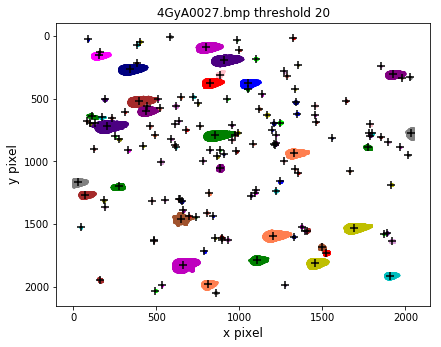

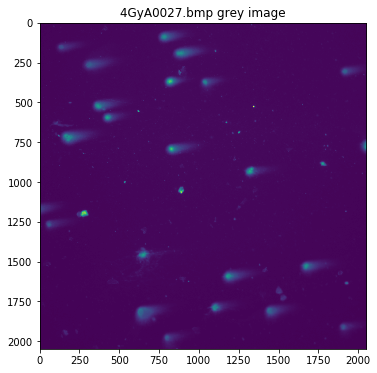

thisThresh is:  25


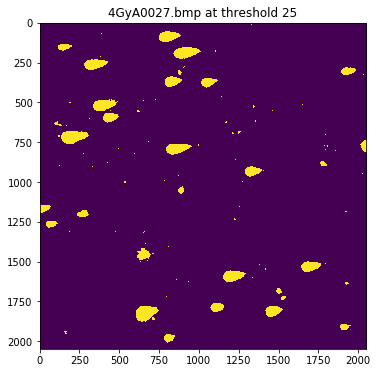

 
Run DBSCAN, threshold number  4  value  25
xIrrad shape:  (135286,)
yIrrad shape:  (135286,)
iThr shape:  (135286,)
imgGrey shape:  (2048, 2048)


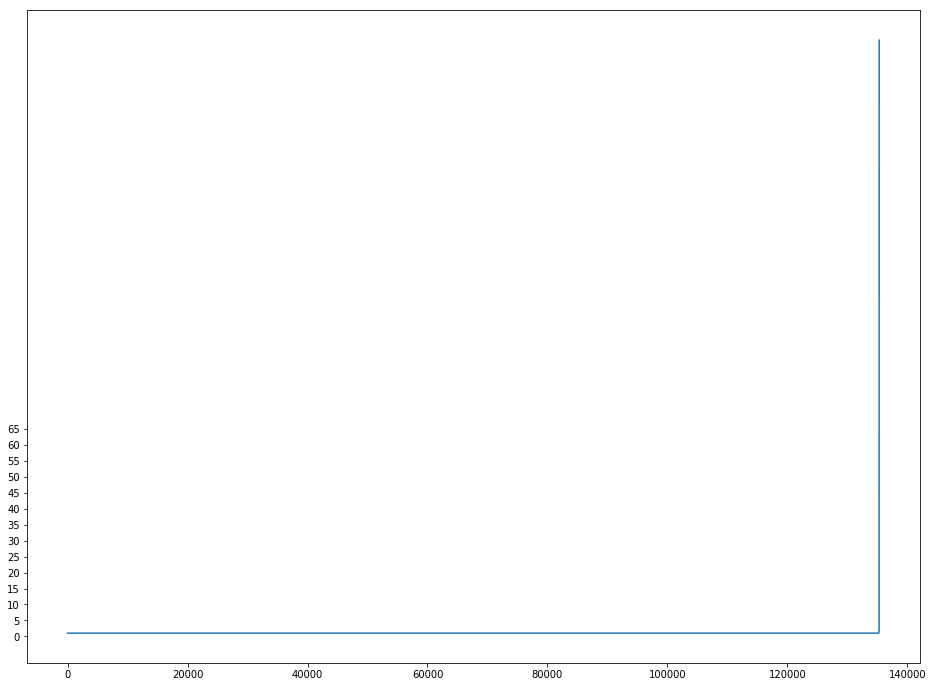

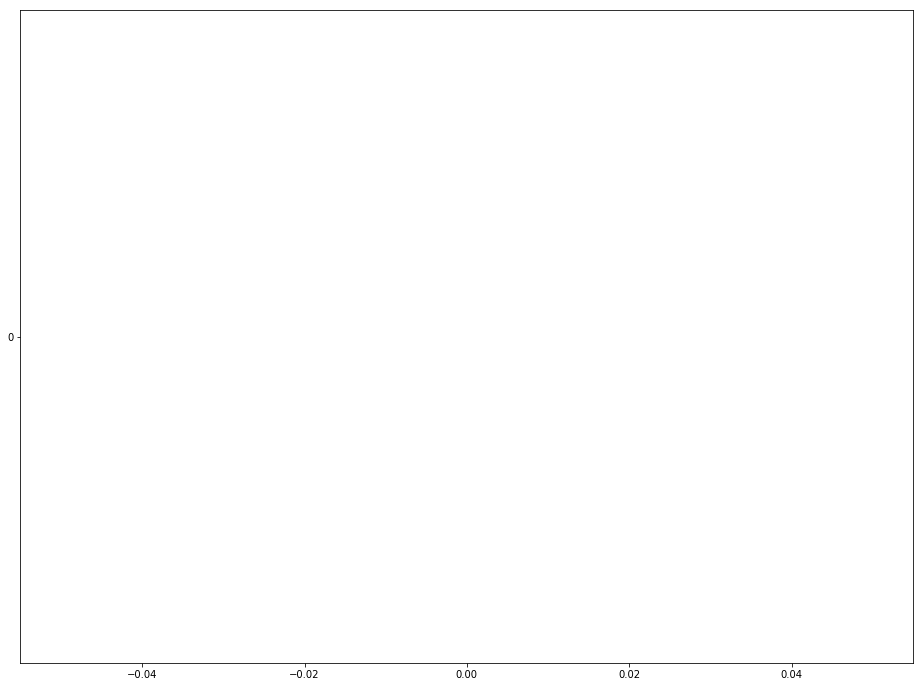

Number of clusters 117
Average number of pixels per cluster 1156.025641025641
Average xWid 30.00854700854701 standard deviation 46.04837584976952
Average yWid 20.11965811965812 standard deviation 25.370809794460794
Number of clusters in fiducial area 111
Average number of pixels per cluster in fiducial area 1173.1351351351352
Average xWidFid 7.117786388954031 standard deviation 10.950502154561695
Average yWidFid 4.7444120995152534 standard deviation 5.828717331467948


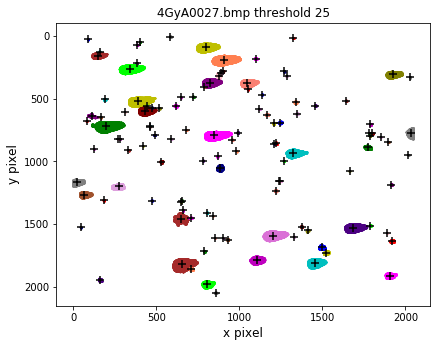

 
Date and time 2022-01-23 21:00:41.801509
Time since last check is 0:01:51.077110


In [56]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
import numpy as np
from sklearn.neighbors import NearestNeighbors
import glob
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
#
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from skimage.filters import threshold_local
from sklearn.cluster import DBSCAN
#
withHists = False
minSamples = 4
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0027.bmp"
#imFile = "../CometImages/exp-val/comets62.bmp"

fileList= sorted(glob.glob(imFile))[0]
print("fileList is: ", fileList)
fileNames = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print("fileNames is: ", fileNames) # reading in filenames from a directory
#
#
imgRaw = plt.imread(fileList)
print("ImgRaw shape",imgRaw.shape)
imgGrey, nRows, nCols = processImage(imgRaw)
nRows = imgRaw.shape[0] #took New out
nCols = imgRaw.shape[1] # ""
if len(imgRaw.shape) == 2:
    nDepth = 1
else:
    nDepth = imgRaw.shape[2] # ""

ImgArr = np.zeros((nRows, nCols))
if nDepth == 1:
    ImgArr[0: nRows, 0:nCols] = imgRaw[0: nRows, 0:nCols] #take out the 3rd dimension (0) if RGB(A) image
else:
    ImgArr[0: nRows, 0:nCols] = imgRaw[0: nRows, 0:nCols, 0]
#
maxPix = np.max(imgGrey)
minPix = np.min(imgGrey)
print("max and min pixel values for ", fileNames, " is: ", maxPix, minPix)
#
#plot histogram of raw image intensities
fig, ax = plt.subplots(1)
plt.title("Histogram of raw " + str(fileNames))
# change font size for x axis
ax.tick_params(axis='both', which='major', labelsize=12)
#
plt.xlabel("intensity value", fontsize = 16)
plt.ylabel("frequency", fontsize = 16)
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True)
plt.show()
#plot histogram of grey image intensities
fig, ax = plt.subplots(1)
plt.title("Histogram of grey " + str(fileNames))
# change font size for x axis
ax.tick_params(axis='both', which='major', labelsize=12)
#
plt.xlabel("intensity value", fontsize = 16)
plt.ylabel("frequency", fontsize = 16)
n, bins, patches = ax.hist(imgGrey.flatten(), bins=np.arange(0, maxPix, 1), log=True)
plt.show()
#
thresh = np.linspace(0.02, 0.1, 5) * maxPix
print("thresh is: ", thresh)
nThresh = len(thresh)
#
xEdge = 32
yEdge = 16
xLim = xEdge*np.ones(2).astype(int)
xLim[1] = nCols - xEdge
yLim = yEdge*np.ones(2).astype(int)
yLim[1] = nRows - yEdge
print("Image dimension in x",nCols,"pixels, in y",nRows,"pixels")
print("Clusters analysed if centre in x range",xLim[0],"to",xLim[1],"and y range",yLim[0],"to",yLim[1])
#
#to store cluster info
nMeanPix = np.zeros(nThresh)
xMeanWid = np.zeros(nThresh)
yMeanWid = np.zeros(nThresh)
xStdWid = np.zeros(nThresh)
yStdWid = np.zeros(nThresh)
nClus = np.zeros(nThresh).astype(int)
#
nMeanPixFid = np.zeros(nThresh)
xMeanWidFid = np.zeros(nThresh)
yMeanWidFid = np.zeros(nThresh)
xStdWidFid = np.zeros(nThresh)
yStdWidFid = np.zeros(nThresh)
nClusFid = np.zeros(nThresh).astype(int)
#
nColTab = 20
colorTab = ['r', 'b', 'g', 'y', 'm', 'c', 'Brown', 'Coral', 'Fuchsia', 'Indigo', 'Lime', 'Maroon', \
           'Navy', 'Olive', 'Orchid', 'Pink', 'Plum', 'Purple', 'Salmon', 'Sienna']

for n in range(1, nThresh):
    fig = plt.figure(figsize = (10, 6))
    plt.title(str(fileName) + " grey image")
    plt.imshow(imgGrey)
    plt.show()
    #
    thisThresh = thresh[n].astype(int)
    print("thisThresh is: ", thisThresh)
    imgThr = imgGrey > thisThresh
    fig = plt.figure(figsize = (10, 6))
    plt.title(str(fileName) + " at threshold " + str(thisThresh))
    plt.imshow(imgThr)
    plt.show()
    
    ###########################################
    #from other notebook
    yIrrad, xIrrad = np.where(imgGrey > thisThresh)
    lThresh = len(xIrrad)
    #
    print(" ")
    print("Run DBSCAN, threshold number ",n," value ",thisThresh)
    #
    scanData = np.zeros((lThresh,2))
    scanData[:, 0] = xIrrad
    scanData[:, 1] = yIrrad
    iThr = imgGrey[yIrrad, xIrrad]
    print("xIrrad shape: ", xIrrad.shape)
    print("yIrrad shape: ", yIrrad.shape)
    print("iThr shape: ", iThr.shape)
    print("imgGrey shape: ", imgGrey.shape)
    #
    #Find best epsilon value for minPoints = 4
    neighbors = NearestNeighbors(n_neighbors = minPoints)
    neighbors_fit = neighbors.fit(scanData)
    distances, indices = neighbors_fit.kneighbors(scanData)
    distances = np.sort(distances, axis = 0)
    distances = distances[:,1]
    nDist = len(distances)
    fig = plt.figure(figsize = (16, 12))
    plt.yticks(np.arange(0, 70, 5))
    plt.plot(distances)
    plt.show()
    #
    #zoom in on dist plot to get eps
    crop = 210000
    epsilon = 3
    #epsLine = np.ones(nDist-crop) * epsilon
    fig = plt.figure(figsize = (16, 12))
    plt.yticks(np.arange(0, 70, 5))
    plt.plot(distances[crop:])
    #plt.plot(epsLine, c = 'r')
    plt.show()
              
    #
    fig = plt.figure(figsize=(6.7, 5.2))
    plt.title(str(fileName) + " threshold " + str(thisThresh), fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    if __name__ == '__main__':
        clusterer = DBSCAN(eps = epsilon, min_samples = minSamples).fit(scanData)
    #
    cluster_labels = clusterer.fit_predict(scanData)
    #
    nClusHere = np.amax(cluster_labels) + 1
    #
    nClus[n] = nClusHere
    nPixels = np.zeros(nClusHere)
    nPixelsFid = np.zeros(nClusHere)
    xClusters = np.zeros(nClusHere)
    yClusters = np.zeros(nClusHere)
    xWid = np.zeros(nClusHere)
    yWid = np.zeros(nClusHere)
    xWidFid = np.zeros(nClusHere)
    yWidFid = np.zeros(nClusHere)
    #
    indexCl = np.zeros(lThresh)
    xPixelsCl = np.zeros(lThresh)
    yPixelsCl = np.zeros(lThresh)
    xPixelsHere = np.zeros(lThresh)
    yPixelsHere = np.zeros(lThresh)
    iPixelsHere = np.zeros(lThresh)
    #
    nCol = 0
    nClusFidHere = 0
    for nC in range(0, nClusHere):
        logicalCl = cluster_labels == nC
        nHere = np.sum(logicalCl).astype(int)
        nPixels[nC] = nHere
#
        xPixelsHere = scanData[logicalCl, 0]
        yPixelsHere = scanData[logicalCl, 1]
        iPixelsHere = iThr[logicalCl]
        #
        xClusters[nC] = np.sum(xPixelsHere*iPixelsHere)/np.sum(iPixelsHere)
        yClusters[nC] = np.sum(yPixelsHere*iPixelsHere)/np.sum(iPixelsHere)
        #
        if xClusters[nC] > xLim[0] and xClusters[nC] < xLim[1] and \
            yClusters[nC] > yLim[0] and yClusters[nC] < yLim[1]:
            plt.scatter(xPixelsHere, yPixelsHere, s = 1, c = colorTab[nCol], marker = 'o')
            nCol = nCol + 1
            if nCol > nColTab - 1:
                 nCol = 0
            #
            nPixelsFid[nClusFidHere] = nHere
#            xWidFid[nClusFidHere] = np.max(xPixelsHere) - np.min(xPixelsHere)
#            yWidFid[nClusFidHere] = np.max(yPixelsHere) - np.min(yPixelsHere)
            xWidFid[nClusFidHere] = np.std(xPixelsHere)
            yWidFid[nClusFidHere] = np.std(yPixelsHere)
            nClusFidHere = nClusFidHere + 1            
        else:
            plt.scatter(xPixelsHere, yPixelsHere, s = 1, c = "Grey", marker = 'o')
        #
        xWid[nC] = np.max(xPixelsHere) - np.min(xPixelsHere)
        yWid[nC] = np.max(yPixelsHere) - np.min(yPixelsHere)
#        xWid[nC] = np.std(xPixelsHere)
#        yWid[nC] = np.std(yPixelsHere)
        #
    nClusFid[n] = nClusFidHere
    #
    # Add cluster positions to plot for this region
    nMeanPix[n] = np.mean(np.trim_zeros(nPixels, 'b'))
    xMeanWid[n] = np.mean(xWid)
    yMeanWid[n] = np.mean(yWid)
    xStdWid[n] = np.std(xWid)
    yStdWid[n] = np.std(yWid)
    #
    nMeanPixFid[n] = np.mean(np.trim_zeros(nPixelsFid, 'b'))
    xMeanWidFid[n] = np.mean(xWidFid)
    yMeanWidFid[n] = np.mean(yWidFid)
    xStdWidFid[n] = np.std(xWidFid)
    yStdWidFid[n] = np.std(yWidFid)
    print("Number of clusters",nClus[n])
    print("Average number of pixels per cluster",nMeanPix[n])
    print("Average xWid",xMeanWid[n],"standard deviation",xStdWid[n])
    print("Average yWid",yMeanWid[n],"standard deviation",yStdWid[n])
    print("Number of clusters in fiducial area",nClusFid[n])
    print("Average number of pixels per cluster in fiducial area",nMeanPixFid[n])
    print("Average xWidFid",xMeanWidFid[n],"standard deviation",xStdWidFid[n])
    print("Average yWidFid",yMeanWidFid[n],"standard deviation",yStdWidFid[n])
    plt.scatter(xClusters, yClusters, s = 50, c = 'k', marker = '+')
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.gca().invert_yaxis()
    plt.show()
    ###################################
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then)) 

## routines for processing image

In [10]:
def processImage(imgRaw):
    #
    import sys
    import numpy as np
    import scipy.ndimage as scimg
    import matplotlib.pyplot as plt
    %matplotlib inline
    # 
    # Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
    nRows = imgRaw.shape[0] 
    nCols = imgRaw.shape[1]
    if len(imgRaw.shape) == 3:
        nDepth = imgRaw.shape[2]
    else:
        nDepth = 1
    #
    thresh = [30, 180]
    nThresh = len(thresh)
    img = np.zeros((nRows, nCols))
    imgThr = np.zeros((nRows, nCols, nThresh))
    #
    # Determine image format and process accordingly
    if nDepth == 4:
        imgRGB = rgba2rgb(imgRaw)
        imgGrey = rgb2grey(imgRGB, 1, withHists)
    elif nDepth == 3:
        imgRGB = imgRaw
        imgGrey = rgb2grey(imgRGB, 1, withHists)
    elif nDepth == 1:
        imgRGB = imgRaw
        imgGrey = imgRaw
    else:
        print(" ")
        print("Unexpected image depth",nDepth)
        sys.stop()
    #
    """
    # Remove "hot" pixels
    print(" ")
    print("Maximum pixel value before removing hot pixels",np.amax(imgGrey))
    print("Minimum pixel value ",np.amin(imgGrey))
    hotPixels = imgGrey > hotCut
    imgGrey[hotPixels] = 0
    #
    # Rescale 
    #imgGrey = np.asarray(255//hotCut*imgGrey, dtype = np.uint8)
    imgGrey = np.asarray((255/hotCut)*imgGrey, dtype = np.uint8)
    """
    #
    print("Type of raw image file is",imgRaw.dtype)
    print("Type of greyscale image file is",imgGrey.dtype)
    print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
    #print("Hot pixel cut",hotCut)
    #print("Number of hot pixels",np.sum(hotPixels))
    #print("Maximum pixel value after removing hot pixels",np.amax(imgGrey))
    print("Maximum pixel value ", np.amax(imgGrey))
    print("Minimum pixel value ",np.amin(imgGrey))
    #
    return imgGrey, nRows, nCols

def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image.
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0, withHists = False):
    '''
    Convert RGB image to greyscale. Input RGB (and flag indicating negative required), output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    if withHists:
        print(" ")
        print("Max intensities red",np.amax(r),"green",np.amax(g), "blue",np.amax(b))
        print(" ")
        nBins = int(256/8)
        nBins = 256
        plt.figure(figsize = (12, 9))
        plt.subplot(4, 1, 1)
        plt.hist(np.ravel(r), bins = nBins, color = 'r')
        plt.yscale("log")
        plt.xlim(-1, 256)
        plt.subplot(4, 1, 2)
        plt.hist(np.ravel(g), bins = nBins, color = 'g')
        plt.yscale("log")
        plt.xlim(-1, 256)
        plt.subplot(4, 1, 3)
        plt.hist(np.ravel(b), bins = nBins, color = 'b')
        plt.yscale("log")
        plt.xlim(-1, 256)
        plt.subplot(4, 1, 4)
        plt.hist(np.ravel(grey), bins = nBins, color = 'k')
        plt.yscale("log")
        plt.xlim(-1, 256)
        plt.tight_layout()
        plt.show()
    #
    return np.asarray(grey, dtype = np.uint8)
#
def ceilDiv(a, b):
    '''
    Return a//b rounded up.
    '''
    ceiling = -(-a//b)
    return ceiling
#
############################################
def rgbSeperate(rgb, filename, withPlots = False):
    '''
    Seperate RGB image into the R, G, B components and plot image in each of these individual channels.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    #grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    if withPlots == True:
        plt.figure(figsize = (12, 9))
        plt.subplot(2, 2, 1)
        plt.title("raw image" + str(filename))
        plt.imshow(rgb, cmap='afmhot')
        plt.subplot(2, 2, 2)
        plt.title("red channel")
        plt.imshow(r, cmap='afmhot')
        plt.subplot(2, 2, 3)
        plt.title("green channel")
        plt.imshow(g, cmap='afmhot')
        plt.subplot(2, 2, 4)
        plt.title("blue channel")
        plt.imshow(b, cmap='afmhot')
        plt.show()
    
    return r, g, b


import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
def edgeFinderIn(picture, edgeWidth, useDiag = True):
    '''
    Return array containing pixels in edges (of width edgeWidth) of input (thresholded) image.
    The edges are inside the original image. The flag useDiag ensures "corner" pixels are selected.
    '''
    #
    shiftR = edgeWidth
    shiftC = edgeWidth
    nRows, nCols = picture.shape
    edges = np.full((nRows, nCols), False)
    imgShift = np.full((nRows, nCols), False)
    #
    # Right edge
    imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
    imgShift[0:nRows, nCols - shiftC:nCols] = False
    edges = np.logical_and(picture, np.logical_not(imgShift))
    #
    # Left edge 
    imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
    imgShift[0:nRows, 0:shiftC] = False
    edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
    #
    # Lower edge 
    imgShift[shiftR:nRows, 0:nCols] = picture[0:nRows - shiftR, 0:nCols]
    imgShift[0:shiftR, 0:nCols] = False    
    edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
    #
    # Upper edge 
    imgShift[0:nRows - shiftR, 0:nCols] = picture[shiftR:nRows, 0:nCols]    
    imgShift[nRows - shiftR:nRows, 0:nCols] = False
    edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
    #
    if useDiag:
        #
        # Left upper edge
        imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
        imgShift[0:nRows, nCols - shiftC:nCols] = False
        imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
        imgShift[0:shiftR, 0:nCols] = False    
        edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
        #
        # Left lower edge
        imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
        imgShift[0:nRows, nCols - shiftC:nCols] = False
        imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
        imgShift[nRows - shiftR:nRows, 0:nCols] = False
        edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
        #
        # Right upper edge 
        imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
        imgShift[0:nRows, 0:shiftC] = False
        imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
        imgShift[0:shiftR, 0:nCols] = False    
        edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
        #
        # Right lower edge 
        imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
        imgShift[0:nRows, 0:shiftC] = False
        imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
        imgShift[nRows - shiftR:nRows, 0:nCols] = False
        edges = np.logical_or(edges, np.logical_and(picture, np.logical_not(imgShift)))
    #
    return edges
#
#
def expander(picture, edgeWidth, useDiag = True):
    '''
    Return array containing thresholded regions expanded by band of width edgeWidth. The flag useDiag ensures
    "corner" pixels are included correctly.
    '''
    #
    shiftR = 1
    shiftC = 1
    nRows, nCols = picture.shape
    edges = np.full((nRows, nCols), False)
    edgeSum = np.full((nRows, nCols), False)
    imgShift = np.full((nRows, nCols), False)
    #
    for  nE in range(0, edgeWidth):
        #
        # Left edge
        imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
        imgShift[0:nRows, nCols - shiftC:nCols] = False
        edges = np.logical_and(np.logical_not(picture), imgShift)
        #
        # Right edge 
        imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
        imgShift[0:nRows, 0:shiftC] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        # Upper edge 
        imgShift[shiftR:nRows, 0:nCols] = picture[0:nRows - shiftR, 0:nCols]
        imgShift[0:shiftR, 0:nCols] = False    
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        # Lower edge 
        imgShift[0:nRows - shiftR, 0:nCols] = picture[shiftR:nRows, 0:nCols]    
        imgShift[nRows - shiftR:nRows, 0:nCols] = False
        edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        if useDiag:
            #
            # Left upper edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Left lower edge
            imgShift[0:nRows, 0:nCols - shiftC] = picture[0:nRows, shiftC:nCols]
            imgShift[0:nRows, nCols - shiftC:nCols] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Right upper edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[shiftR:nRows, 0:nCols] = imgShift[0:nRows - shiftR, 0:nCols]
            imgShift[0:shiftR, 0:nCols] = False    
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
            #
            # Right lower edge 
            imgShift[0:nRows, shiftC:nCols] = picture[0:nRows, 0:nCols - shiftC]
            imgShift[0:nRows, 0:shiftC] = False
            imgShift[0:nRows - shiftR, 0:nCols] = imgShift[shiftR:nRows, 0:nCols]    
            imgShift[nRows - shiftR:nRows, 0:nCols] = False
            edges = np.logical_or(edges, np.logical_and(np.logical_not(picture), imgShift))
        #
        picture = np.logical_or(picture, edges)
        edgeSum = np.logical_or(edges, edgeSum)
    #
    return picture, edgeSum
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2022-01-23 19:45:27.293792
 
Date and time 2022-01-23 19:45:27.297700
Time since last check is 0:00:00.003908
